In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [17]:
status_cash = pd.read_csv('./project_dataset/extract - cash request - data analyst.csv')

<Axes: title={'center': 'Monthly cash request status (binary) percentage comparison'}, xlabel='Month - Year', ylabel='Percent (%)'>

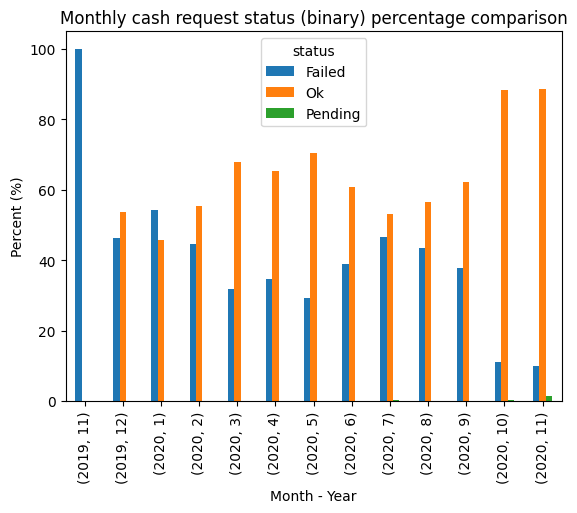

In [18]:
# Percent of cash requests grouped by date and status (status have been reduced to a binary state)

# Convert 'created_at' to datetime
status_cash['created_at'] = pd.to_datetime(status_cash['created_at'])

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year
status_cash["status"] = status_cash["status"].map({
    "active": "Pending",
    "canceled": "Failed",
    "direct_debit_rejected": "Failed",
    "direct_debit_sent": "Ok",
    "money_back": "Ok",
    "rejected": "Failed",
    "transaction_declined": "Failed"
})

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)

gb = gb.div(gb.sum(axis=1), axis=0) * 100

gb.plot(kind="bar", stacked=False, xlabel="Month - Year", ylabel="Percent (%)", title="Monthly cash request status (binary) percentage comparison")

<Axes: title={'center': 'Monthly cash request status percentage'}, xlabel='Month - Year', ylabel='Percent (%)'>

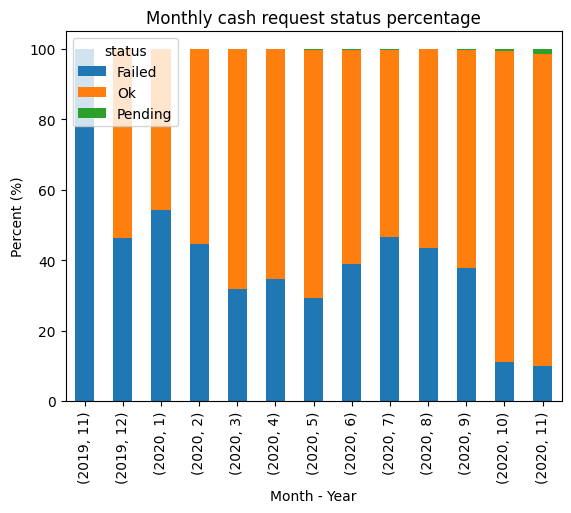

In [19]:
# Percent of cash requests grouped by date and status

status_cash["month"] = status_cash["created_at"].dt.month
status_cash["year"] = status_cash["created_at"].dt.year

gb = status_cash.groupby(["year", "month", "status"]).size().unstack(fill_value=0)

gb = gb.div(gb.sum(axis=1), axis=0) * 100

gb.plot(kind="bar", stacked=True, xlabel="Month - Year", ylabel="Percent (%)", title="Monthly cash request status percentage")